In [17]:
import pandas as pd
df = pd.read_csv("bank-full.csv", sep=';')

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [21]:
# Ver estructura general
df.info()

# Revisar valores únicos de la columna objetivo
df['y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


y
no     39922
yes     5289
Name: count, dtype: int64

## Analicé los datos, hay 39 mil columnas de "no aceptó la campaña" vs 5 mil de "sí la aceptó" 

## Codifico los datos para convertirlos en valores booleanos:

In [23]:
# Codificar la variable objetivo: 'yes' -> 1, 'no' -> 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Convertir variables categóricas usando One Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


## Primer modelo: regresión lineal

In [27]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop('y', axis=1)  # Variables predictoras
y = df_encoded['y']  # Variable objetivo

# Dividir en datos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver tamaños de las divisiones
print("Tamaño de los datos de entrenamiento:", X_train.shape)
print("Tamaño de los datos de prueba:", X_test.shape)


Tamaño de los datos de entrenamiento: (36168, 42)
Tamaño de los datos de prueba: (9043, 42)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación (precisión, recall, f1-score)
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 89.86%

Matriz de confusión:
[[7753  199]
 [ 718  373]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



C:\Users\jsofi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Segundo modelo: Árbol de decisiones

In [31]:
# Importar el modelo de Árbol de Decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Árbol de Decisiones
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred_dt = dt_model.predict(X_test)

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Precisión del Árbol de Decisiones: {accuracy_dt * 100:.2f}%")

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt))

# Informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred_dt))


Precisión del Árbol de Decisiones: 87.05%

Matriz de confusión:
[[7344  608]
 [ 563  528]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



## Agregamos datos con SMOTE, una técnica estadística que genera ejemplos sintéticos de la clase minoritaria (yes) para balancear los datos.

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Mostrar nuevo balance
print("Distribución antes de SMOTE:", y_train.value_counts())
print("Distribución después de SMOTE:", y_train_sm.value_counts())


Distribución antes de SMOTE: y
0    27945
1     3702
Name: count, dtype: int64
Distribución después de SMOTE: y
0    27945
1    27945
Name: count, dtype: int64


## Tercer y mejor modelo: Random Forest, un conjunto de árboles de decisión

In [41]:
# Importar el modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=15, min_samples_split=15)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest: {accuracy_rf * 100:.2f}%")

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

# Informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred_rf))



Precisión del Random Forest: 90.47%

Matriz de confusión:
[[11785   192]
 [ 1100   487]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11977
           1       0.72      0.31      0.43      1587

    accuracy                           0.90     13564
   macro avg       0.82      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



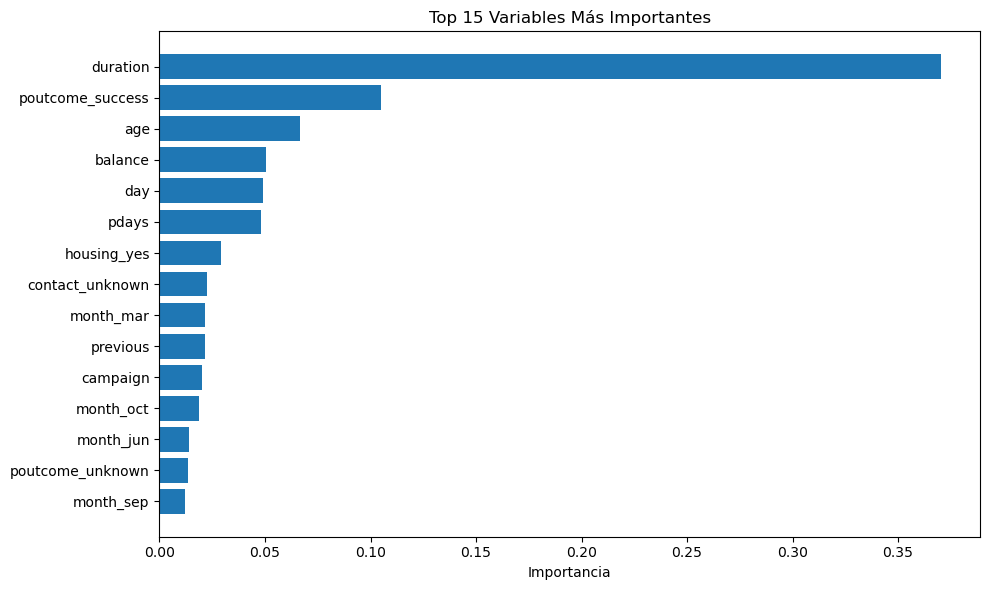

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener importancias
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1])
plt.xlabel('Importancia')
plt.title('Top 15 Variables Más Importantes')
plt.tight_layout()
plt.show()


In [45]:
# Eliminar la columna 'duration' antes de dividir y aplicar SMOTE
df_encoded_realistic = df_encoded.drop('duration', axis=1)

# Separar características y target
X = df_encoded_realistic.drop('y', axis=1)
y = df_encoded_realistic['y']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [48]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=15)
rf_model.fit(X_train_sm, y_train_sm)

y_pred_rf = rf_model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred_rf))


Precisión: 0.8758478324977883

Matriz de confusión:
 [[11199   778]
 [  906   681]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     11977
           1       0.47      0.43      0.45      1587

    accuracy                           0.88     13564
   macro avg       0.70      0.68      0.69     13564
weighted avg       0.87      0.88      0.87     13564



In [50]:
accuracy_lr = 0.8986      # Regresión logística
accuracy_dt = 0.8705      # Árbol de decisión
accuracy_rf = 0.9010      # Random Forest


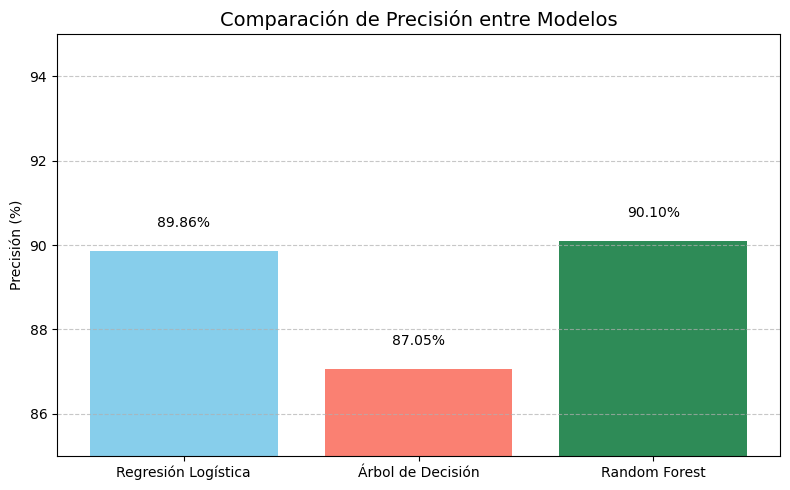

In [52]:
import matplotlib.pyplot as plt

# Nombres de los modelos
modelos = ['Regresión Logística', 'Árbol de Decisión', 'Random Forest']
# Precisión de cada modelo
precisiones = [accuracy_lr, accuracy_dt, accuracy_rf]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(modelos, [p * 100 for p in precisiones], color=['skyblue', 'salmon', 'seagreen'])

# Añadir etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Personalización del gráfico
plt.title('Comparación de Precisión entre Modelos', fontsize=14)
plt.ylabel('Precisión (%)')
plt.ylim(85, 95)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
